# Predict if a customer subscribes to a term deposit or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics using bank-additional-full.csv dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
cat_col=df.select_dtypes(include=['O'])
cat_col

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [6]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
df[df['job']=='unknown'].count()[1]

330

In [8]:
(df[df['job']=='unknown'].count()[1])/len(df)*100

0.8012042342429834

data says our unknown records are less than 2% of whole data. So we can eliminate those rows.

In [9]:
df.drop(df[df['job']=='unknown'].index,axis=0,inplace=True)

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [12]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [13]:
df[df['marital']=='unknown'].count()[1]

71

In [14]:
df[df['marital']=='unknown'].count()[1]/len(df)*100

0.17377257819766018

data says our unknown records are less than 2% of whole data. So we can eliminate those rows.

In [15]:
df.drop(df[df['marital']=='unknown'].index,axis=0,inplace=True)

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
mari={'married':2, 'single':1, 'divorced':0}
df['marital']=df['marital'].map(mari)

In [18]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [19]:
df[df['education']=='unknown'].count()[1]/len(df)*100

3.9130114987618607

data says our unknown records are greater than 2% of whole data. So we can fill those rows with mode of that particular column.

In [20]:
df['education']=df['education'].replace('unknown',df['education'].mode()[0])

In [21]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [22]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

<AxesSubplot:xlabel='default', ylabel='count'>

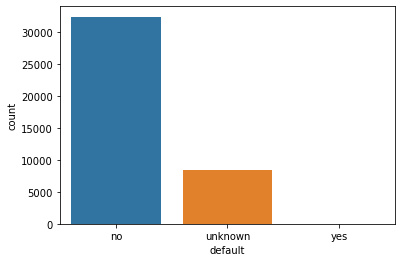

In [23]:
sns.countplot(x=df['default'])

In [24]:
df['default'].value_counts()

no         32348
unknown     8436
yes            3
Name: default, dtype: int64

In [25]:
df[df['default']=='unknown'].count()[1]/len(df)*100

20.683060779169836

data says our unknown records are greater than 2% and lesser than 40% of whole data. So we can fill those rows with mode of that particular column.

In [26]:
df['default']=df['default'].replace('unknown',df['default'].mode()[0])

In [27]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labenc=LabelEncoder()

In [30]:
df['default']=labenc.fit_transform(df['default'])

In [31]:
df['default'].unique()

array([0, 1])

In [32]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [33]:
df[df['housing']=='unknown'].count()[1]/len(df)*100

2.4125334052516734

data says our unknown records are greater than 2% of whole data. So we can fill those rows with mode of that particular column.

<AxesSubplot:xlabel='housing', ylabel='count'>

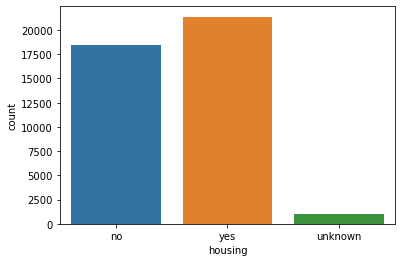

In [34]:
sns.countplot(x=df['housing'])

In [35]:
df['housing']=df['housing'].replace('unknown',df['housing'].mode()[0])

In [36]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
df['housing']=labenc.fit_transform(df['housing'])

In [38]:
df['housing'].unique()

array([0, 1])

In [39]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

<AxesSubplot:xlabel='loan', ylabel='count'>

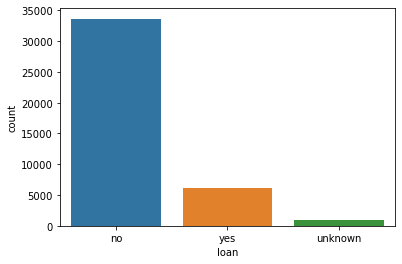

In [40]:
sns.countplot(x=df['loan'])

In [41]:
df[df['loan']=='unknown'].count()[1]/len(df)*100

2.4125334052516734

data says our unknown records are greater than 2% of whole data. So we can fill those rows with mode of that particular column.

In [42]:
df['loan']=df['loan'].replace('unknown',df['loan'].mode()[0])

In [43]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
df['loan']=labenc.fit_transform(df['loan'])

In [45]:
df['loan'].unique()

array([0, 1])

In [46]:
df.rename(columns={'loan':'personal_loan'},inplace=True)

In [47]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<AxesSubplot:xlabel='contact', ylabel='count'>

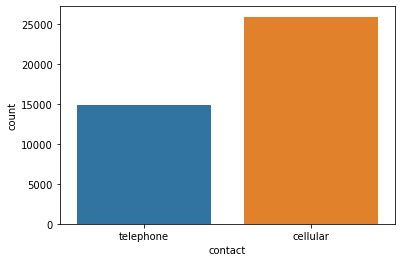

In [48]:
sns.countplot(x=df['contact'])

In [49]:
df['contact']=labenc.fit_transform(df['contact'])
df['contact'].unique()

array([1, 0])

'telephone':1, 'cellular':0

In [50]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [51]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month']=df['month'].map(months)

In [52]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [53]:
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [54]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [55]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign 
#(numeric; 999 means client was not previously contacted)
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [56]:
df['pdays'].value_counts()

999    39297
3        431
6        404
4        116
9         64
7         60
2         59
12        58
10        52
5         46
13        35
11        27
1         25
15        24
14        20
8         17
0         15
16        10
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [57]:
df['past_contacted']=df['pdays'].apply(lambda row: 0 if row == 999 else 1)
df[df['past_contacted']==1]

,age,job,marital,education,default,housing,personal_loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,past_contacted
23831,37,admin.,2,university.degree,0,1,0,1,11,wed,...,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no,1
23986,48,management,2,university.degree,0,1,0,0,11,mon,...,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1
24001,42,technician,2,professional.course,0,1,0,0,11,mon,...,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1
24119,50,entrepreneur,2,university.degree,0,1,0,0,11,mon,...,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1
24204,36,self-employed,1,university.degree,0,1,0,0,11,mon,...,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40762,35,technician,0,basic.4y,0,1,0,0,11,tue,...,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1
40763,54,admin.,2,professional.course,0,0,0,0,11,tue,...,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1
40773,62,retired,2,university.degree,0,1,0,0,11,thu,...,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1
40777,62,retired,2,university.degree,0,0,0,0,11,thu,...,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1


In [58]:
#previous: number of contacts performed before this campaign and for this client (numeric)
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [59]:
#poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

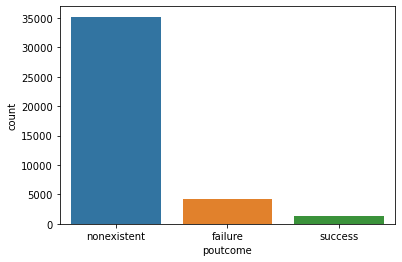

In [60]:
sns.countplot(df['poutcome'])

In [61]:
poutc=pd.get_dummies(df['poutcome'],prefix='poutcome')
poutc

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
40782,0,1,0
40783,0,1,0
40784,0,1,0
40785,0,1,0


In [62]:
poutc.drop('poutcome_success',axis=1,inplace=True)
df=pd.concat([df,poutc],axis=1)

In [63]:
df

,age,job,marital,education,default,housing,personal_loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,past_contacted,poutcome_failure,poutcome_nonexistent
0,56,housemaid,2,basic.4y,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1
1,57,services,2,high.school,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1
2,37,services,2,high.school,0,1,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1
3,40,admin.,2,basic.6y,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1
4,56,services,2,high.school,0,0,1,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,73,retired,2,professional.course,0,1,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,1
40783,46,blue-collar,2,professional.course,0,0,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,1
40784,56,retired,2,university.degree,0,1,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,1
40785,44,technician,2,professional.course,0,0,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,1


In [64]:
# emp.var.rate: employment variation rate - quarterly indicator (numeric)
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [65]:
#cons.price.idx: consumer price index - monthly indicator (numeric)
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [66]:
#cons.conf.idx: consumer confidence index - monthly indicator (numeric)
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [67]:
df['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [68]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [69]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [70]:
df.rename(columns={'y':'target'},inplace=True)

In [71]:
df['target']=labenc.fit_transform(df['target'])
df['target'].unique()

array([0, 1])

In [72]:
df

,age,job,marital,education,default,housing,personal_loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,past_contacted,poutcome_failure,poutcome_nonexistent
0,56,housemaid,2,basic.4y,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
1,57,services,2,high.school,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
2,37,services,2,high.school,0,1,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
3,40,admin.,2,basic.6y,0,0,0,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
4,56,services,2,high.school,0,0,1,1,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,73,retired,2,professional.course,0,1,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,1
40783,46,blue-collar,2,professional.course,0,0,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1
40784,56,retired,2,university.degree,0,1,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1
40785,44,technician,2,professional.course,0,0,0,0,11,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,1


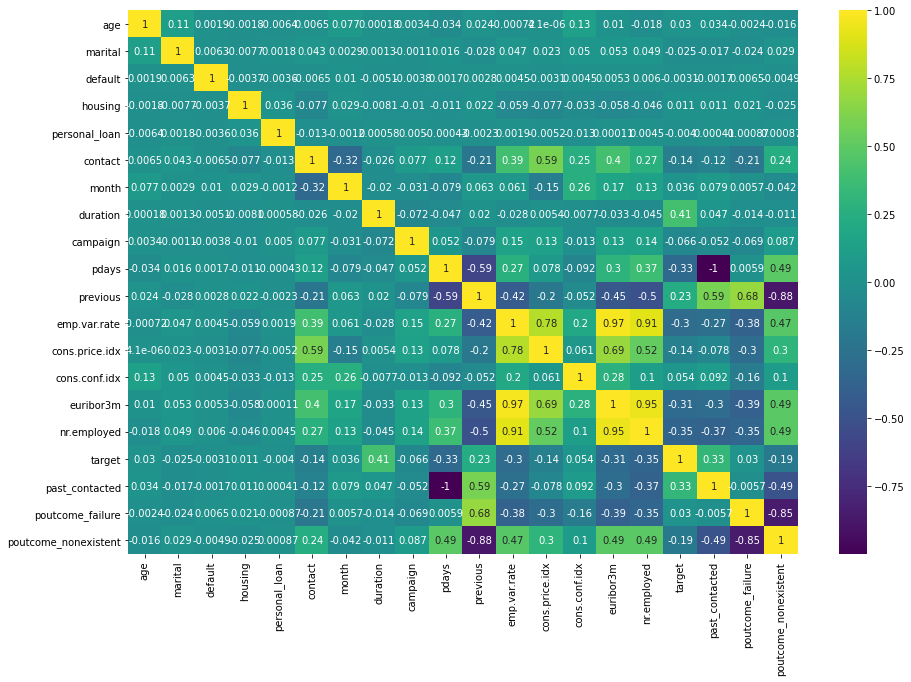

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

### When we want to predict, if customer subscribes to term deposit or not, we dont want to consider unnecessary columns for X, like below.

In [74]:
X=df.drop(['job','education','day_of_week','poutcome','target'],axis=1)
y=df['target']

In [75]:
X

,age,marital,default,housing,personal_loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,past_contacted,poutcome_failure,poutcome_nonexistent
0,56,2,0,0,0,1,5,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
1,57,2,0,0,0,1,5,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
2,37,2,0,1,0,1,5,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
3,40,2,0,0,0,1,5,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
4,56,2,0,0,1,1,5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,73,2,0,1,0,0,11,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1
40783,46,2,0,0,0,0,11,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1
40784,56,2,0,1,0,0,11,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1
40785,44,2,0,0,0,0,11,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1


In [76]:
y

0        0
1        0
2        0
3        0
4        0
        ..
40782    1
40783    0
40784    0
40785    1
40786    0
Name: target, Length: 40787, dtype: int32

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=143)

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [79]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [80]:
from sklearn.svm import SVC
svc=SVC()

In [81]:
svc.fit(X_train,y_train)
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
def metric(y_act,y_pred):
    print(classification_report(y_act,y_pred))
    print(accuracy_score(y_act,y_pred))
    print(confusion_matrix(y_act,y_pred))

In [83]:
print('Train data')
print(metric(y_train,y_train_pred))
print('Test data')
print(metric(y_test,y_test_pred))

Train data
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28942
           1       0.71      0.40      0.51      3687

    accuracy                           0.91     32629
   macro avg       0.82      0.69      0.73     32629
weighted avg       0.90      0.91      0.90     32629

0.9140948236231573
[[28351   591]
 [ 2212  1475]]
None
Test data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7251
           1       0.66      0.35      0.46       907

    accuracy                           0.91      8158
   macro avg       0.79      0.66      0.70      8158
weighted avg       0.89      0.91      0.89      8158

0.907697965187546
[[7086  165]
 [ 588  319]]
None


In [84]:
X_train[1]

array([ 0.48579792,  0.73448006, -0.00958912, -1.10008528, -0.42299069,
       -0.75737671,  0.67807076,  1.01700823,  0.88136716,  0.19741858,
       -0.35068329,  0.84016776, -0.22983637,  0.9568634 ,  0.77706029,
        0.84435438, -0.19742007, -0.33864875,  0.39847532])

In [85]:
y_train[1]

0

In [86]:
svc.predict([[0.48579792,  0.73448006, -0.00958912, -1.10008528, -0.42299069,
       -0.75737671,  0.67807076,  1.01700823,  0.88136716,  0.19741858,
       -0.35068329,  0.84016776, -0.22983637,  0.9568634 ,  0.77706029,
        0.84435438, -0.19742007, -0.33864875,  0.39847532]])

array([0])

# Our SVC model is predicting Good!!